In [ ]:
!pip install wget
!wget -O task1.zip "https://www.dropbox.com/s/q1ocbx36nn96bkf/multimodal-sentiment-analysis-cuet-nlp.zip?dl=1"
!unzip "/content/task1.zip" -d "/content/"
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-02-16 15:19:20--  https://www.dropbox.com/s/q1ocbx36nn96bkf/multimodal-sentiment-analysis-cuet-nlp.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/q1ocbx36nn96bkf/multimodal-sentiment-analysis-cuet-nlp.zip [following]
--2023-02-16 15:19:20--  https://www.dropbox.com/s/dl/q1ocbx36nn96bkf/multimodal-sentiment-analysis-cuet-nlp.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfb128da223568a8a053e3118d9.dl.dropboxusercontent.com/cd/0/get/B2nbHpglPC5DQP2XcUn7vf-tcu8HAHrgcDRUqbXLLkmNU8WrjcM6z1OBmwNVQf0jZ607xMf9mVm6xEWU9ZqBwQfu89awQsmaxg73YzPy9ozNRbllFgSnPF3s27fLz5IkWfoVk9iqrTttdnWaM_xVbkbdOL01x9kW2y8kwsVAaC06GBZheaebd3Zs

In [ ]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
df.head()

,image_name,Captions,Label_Sentiment,Label
0,KAM (137).png,যদি জেমস বন্ড HSC পরীক্ষা দিতো আর পাশ করতো... ...,positive,0
1,Halal Memes (95).jpg,When a Sundori gives Ha Ha react on my meme :,negative,1
2,nurani-memes (182).jpg,meyeta eto ratre baire chilo dekhe rape korsi ...,negative,1
3,KAM (535).jpg,"চাকিপ, চল! নেকেড নেকেড খেলি! বলদ, ওইটা নেকেড ন...",positive,0
4,ovodro_img (512).jpg,গালফ্রেন্ডঃ বাবু আজকে বাড়িতে কেও নেই... শুধু আ...,negative,1


(array([1064.,    0.,    0.,    0.,    0., 2204.,    0.,    0.,    0.,
         227.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

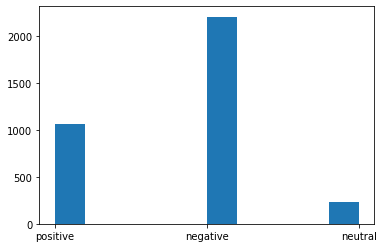

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Label_Sentiment'])

In [ ]:
df['Label'].unique()

array([0, 1, 2])

In [ ]:
import tensorflow as tf
import transformers
import keras
from keras.models import Model
# from keras.applications.resnet_v2 import ResNet152V2
# from keras.applications import Xception
from transformers import ViTFeatureExtractor, TFViTModel, TFViTForImageClassification, BertTokenizerFast, TFBertModel
from transformers import RobertaTokenizerFast, TFBertModel, TFRobertaModel, MPNetTokenizerFast, TFMPNetModel, ElectraTokenizerFast, TFElectraModel, BertTokenizer
from PIL import Image
# from keras.applications.resnet_v2 import preprocess_input
#from keras.applications.inception_v3 import InceptionV3

from tensorflow.data import Dataset
from tensorflow import keras
from collections import Counter
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img, smart_resize
from PIL import ImageFile

import pandas as pd
import numpy as np
import os

ImageFile.LOAD_TRUNCATED_IMAGES = True
transformers.__version__

'4.26.1'

In [ ]:
# VG16
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
filenames = np.asarray(df['image_name'])
filenames = np.stack(filenames)
text = np.asarray(df['Captions'])
text = np.stack(text)
Y_misogyny = np.asarray(df['Label'])
Y_misogyny = Y_misogyny.astype(np.int)
Counter(Y_misogyny)

<ipython-input-7-46a46e0471e2>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_misogyny = Y_misogyny.astype(np.int)


Counter({0: 1064, 1: 2204, 2: 227})

In [ ]:
filenames_train, filenames_val, text_train, text_val, Y_train_misogyny, Y_val_misogyny = train_test_split(filenames,
                                                                                                          text,
                                                                                                          Y_misogyny,
                                                                                                          test_size=0.05,
                                                                                                          random_state=1804000)

In [ ]:
# print("Train")
# print(np.shape(filenames_train), type(filenames_train))
# print(np.shape(text_train), type(text_train))
# print(np.shape(Y_train_misogyny), type(Y_train_misogyny))
# print("Val")
# print(np.shape(filenames_val))
# print(np.shape(text_val))
# print(np.shape(Y_val_misogyny))

In [ ]:
txt_checkpoint = "sagorsarker/bangla-bert-base"
# img_checkpoint = "google/vit-base-patch16-224-in21k"

In [ ]:
tokenizer = BertTokenizer.from_pretrained(txt_checkpoint)

train_encodings = tokenizer(list(text_train), max_length=512, truncation=True, padding="max_length", return_tensors='tf')
print(np.shape(train_encodings["input_ids"]))

val_encodings = tokenizer(list(text_val), max_length=512, truncation=True, padding="max_length", return_tensors='tf')
print(np.shape(val_encodings["input_ids"]))

(3320, 512)
(175, 512)


In [ ]:
resnet = VGG16( include_top=True, weights='imagenet' )
resnet = Model(inputs=resnet.input, outputs=resnet.layers[-2].output)
resnet.summary()

# from keras.applications import xception

# xception_base = xception.Xception(include_top=True, weights='imagenet',)
# xception = Model(inputs = xception_base.input, outputs=xception_base.layers[-2].output)
# xception.trainable = False
# xception.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Attention Model base models
def attention_based_model(input_shape):
    # img_input = keras.Input(shape=(3, 224, 224), dtype='float32')
    img_embed = keras.Input(4096,)
    txt_input = keras.Input(shape=input_shape, dtype='int32')
    input_masks = keras.Input(shape=input_shape, dtype='int32')

    # Text
    model_txt = TFBertModel.from_pretrained(txt_checkpoint) # Change model definition as per requirement
    layer_txt = model_txt.layers[0]
    text_seq = layer_txt([txt_input, input_masks])[0]

    text_flatten = tf.keras.layers.Flatten()(text_seq)

    joint_features = tf.keras.layers.Concatenate()([img_embed, text_flatten])

    joint_features = tf.keras.layers.Flatten()(joint_features)

    X = keras.layers.BatchNormalization()(joint_features)

    X = keras.layers.Dense(64,activation='tanh')(X)

    X = keras.layers.Dropout(0.2)(X)

    X = keras.layers.Dense(64,activation='tanh')(X)

    X = keras.layers.Dense(3,activation='softmax')(X)

    model = keras.Model(inputs=[img_embed, txt_input, input_masks], outputs=[X])
    return model

In [ ]:
# Get Training Set images
Xtrain = []
for filename in filenames_train:
    Xtrain.append(load_img('/content/Memes/Memes/'+filename, target_size=(224, 224)))
Xtrain = np.array([np.array(img) for img in Xtrain])
Xtrain = 1.0/255*Xtrain

In [ ]:
# Get Training Set images
XValidation = []
for filename in filenames_val:
    XValidation.append(load_img('/content/Memes/Memes/'+filename, target_size=(224, 224)))
XValidation = np.array([np.array(img) for img in XValidation])
XValidation = 1.0/255*XValidation

In [ ]:
Y_train_misogyny = pd.get_dummies(Y_train_misogyny)
Y_val_misogyny = pd.get_dummies(Y_val_misogyny)

In [ ]:
# from keras.applications.xception import preprocess_input

rgb = preprocess_input(Xtrain)
# embed = xception.predict(rgb)
embed = resnet.predict(rgb)

rgb_val = preprocess_input(XValidation)
# embed_val = xception.predict(rgb_val)
embed_val = resnet.predict(rgb_val)

# train_dataset = get_dataset(embed, train_encodings, Y_train_misogyny)
# val_dataset = get_dataset(embed_val, val_encodings, Y_val_misogyny)

6/6 [==============================] - 2s 428ms/step


In [ ]:
# batch_size = 32
# Train model
model = attention_based_model(512)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit((embed, train_encodings["input_ids"], train_encodings["attention_mask"]), Y_train_misogyny,
                    validation_data=((embed_val, val_encodings["input_ids"], val_encodings["attention_mask"]), Y_val_misogyny),
                    batch_size = 8,
                    epochs=10)

Some layers from the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at sagorsarker/bangla-bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10


415/415 [==============================] - 431s 947ms/step - loss: 0.9540 - accuracy: 0.5491 - val_loss: 0.9406 - val_accuracy: 0.6286
Epoch 2/10
415/415 [==============================] - 394s 949ms/step - loss: 0.8661 - accuracy: 0.6078 - val_loss: 0.9272 - val_accuracy: 0.6286
Epoch 3/10
415/415 [==============================] - 393s 948ms/step - loss: 0.8563 - accuracy: 0.6123 - val_loss: 0.9869 - val_accuracy: 0.4571
Epoch 4/10
415/415 [==============================] - 393s 947ms/step - loss: 0.8538 - accuracy: 0.6163 - val_loss: 1.0012 - val_accuracy: 0.6286
Epoch 5/10
415/415 [==============================] - 393s 947ms/step - loss: 0.8450 - accuracy: 0.6241 - val_loss: 0.9998 - val_accuracy: 0.6343
Epoch 6/10
415/415 [==============================] - 390s 939ms/step - loss: 0.8421 - accuracy: 0.6271 - val_loss: 0.9425 - val_accuracy: 0.6286
Epoch 7/10
415/415 [==============================] - 393s 947ms/step - loss: 0.8401 - accuracy: 0.6232 - val_loss: 0.9832 - val_accura

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
train_encodings = tokenizer(list(test['Captions']), max_length=512, truncation=True, padding="max_length", return_tensors='tf')
print(np.shape(train_encodings["input_ids"]))

# Get Training Set images
filenames_test = list(test['image_name'])
Xtest = []
for filename in filenames_test:
    Xtest.append(load_img('/content/Memes/Memes/'+filename, target_size=(224, 224)))
Xtest = np.array([np.array(img) for img in Xtest])
Xtest = 1.0/255*Xtest

(873, 512)


In [ ]:
rgb = preprocess_input(Xtest)
embed = resnet.predict(rgb)

28/28 [==============================] - 4s 152ms/step


In [ ]:
pred = model.predict((embed, train_encodings['input_ids'], train_encodings['attention_mask']))

28/28 [==============================] - 36s 1s/step


In [ ]:
import pickle
pickle.dump(model,open('yahan.pkl','wb'))


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......concatenate
.........vars
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......flatten
.........vars
......flatten_1
.........vars
......input_layer
.........vars
......input_layer_1
.........vars
......input_layer_2
.........vars
......tf_bert_main_layer
.........embeddings
............LayerNorm
...............vars
..................0
..................1
............dropout
...............vars
............vars
...............0
...............1
...............2
.........encoder
............layer
...............tf_bert_layer
..................attention
.....................dense_output
........................LayerNorm
...........................vars
.................

In [ ]:
with open('submission.csv', 'w') as f:
  f.write("Id,Label\n")
  for i in range(len(pred)):
    f.write(f"{i},{np.argmax(pred[i])}\n")